In [1]:
import csv

def csv_graph(file):
    d = {}
    v = []
    i = 1

    with open(file, 'r') as f:
        table = csv.reader(f)

        for row in table:
            a = int(row[0])
            b = int(row[1])

            if a == i:
                v.append(b)
            else:
                d[i] = v
                i = a
                v = [b]

    return d

==== showing original graph ====


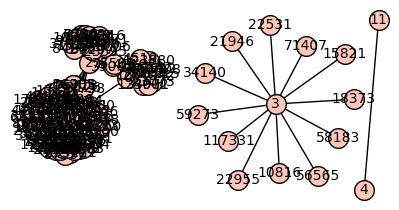

===== showing new cluster (yellow) + remaining nodes (white) =====


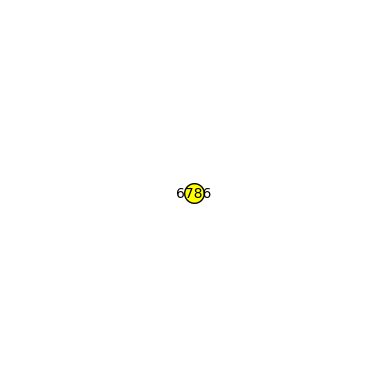

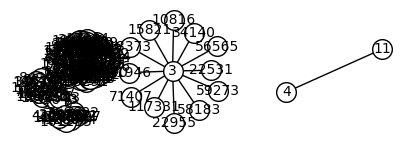

In [6]:
import numpy as np
from sage.graphs.distances_all_pairs import *
verbose = 1

fp = open("/tmp/graph.tex", 'w')   

file = "./datasets/conference/conference-crop.csv"
d = csv_graph(file)
G = Graph(d)

print("==== showing original graph ====")
G.show()

pl = G.graphplot(vertex_colors='white')
print >> fp, 'original graph: \n \n'
print >> fp, '\\begin{figure}[h!]'
print >> fp, latex(G)
print >> fp, '\end{figure}'
print >> fp, '\clearpage \pagebreak';

current_cluster   = Graph()
current_remainder = copy(G)

V = G.num_verts()
E = G.num_edges()

current_vertex = sage.misc.prandom.choice(G.vertices())
current_cluster.add_vertex(current_vertex)
current_remainder.delete_vertex(current_vertex)

if False:

    current_cluster   = copy(G)
    current_remainder = copy(G)
    
    current_cluster.delete_vertex(1)
    current_cluster.delete_vertex(2)
    current_cluster.delete_vertex(7)
    current_cluster.delete_vertex(8)
    
    current_remainder.delete_vertex(3)
    current_remainder.delete_vertex(4)
    current_remainder.delete_vertex(5)
    current_remainder.delete_vertex(6)
    
print("===== showing new cluster (yellow) + remaining nodes (white) =====")
current_cluster.show(vertex_colors = 'yellow')
current_remainder.show(vertex_colors = 'white')

if current_cluster.num_verts() > 0:
    pl = current_cluster.graphplot(vertex_colors = 'white')
    print >> fp, 'first cluster: \n \n'
    print >> fp, '\\begin{figure}[h!]'
    print >> fp, latex(current_cluster)
    print >> fp, '\end{figure}'

pl = current_remainder.graphplot(vertex_colors = 'white')
print >> fp, 'remaining nodes: \n \n'
print >> fp, '\\begin{figure}[h!]'
print >> fp, latex(current_remainder)
print >> fp, '\end{figure}' 
print >> fp, '\clearpage \pagebreak'

moving: 2: (0.0500000000000000, 'move', -104.200000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


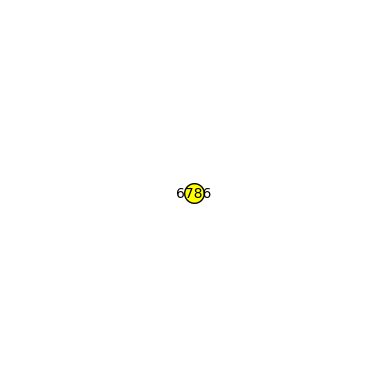

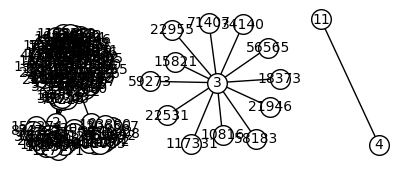

moving: 0: (-0.900000000000000, 'move', -113.250000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


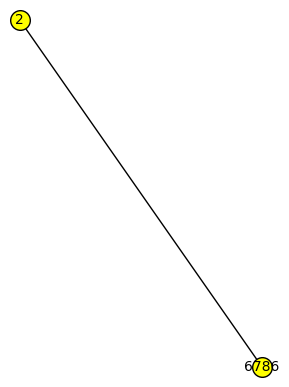

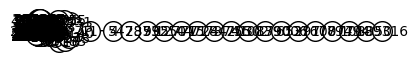

moving: 1: (-0.850000000000000, 'move', -38.3000000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


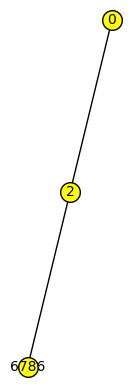

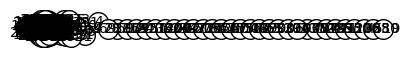

moving: 75503: (-1.80000000000000, 'move', -126.350000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


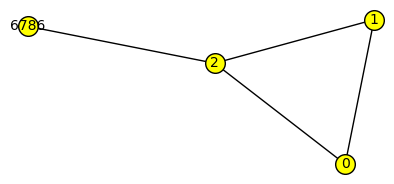

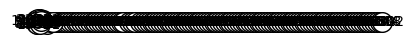

moving: 66305: (-2.75000000000000, 'move', -125.400000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


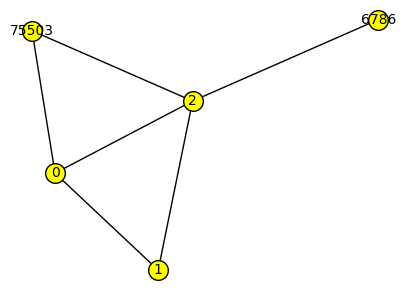

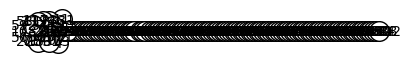

moving: 33043: (-3.70000000000000, 'move', -124.450000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


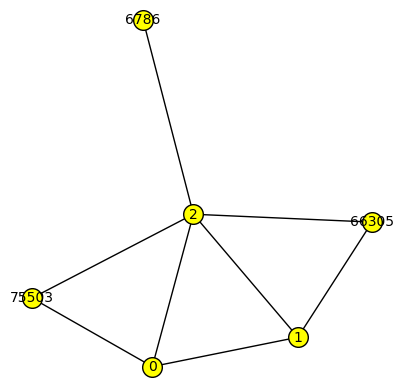

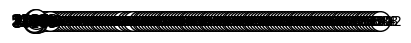

moving: 33126: (-4.65000000000000, 'move', -123.500000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


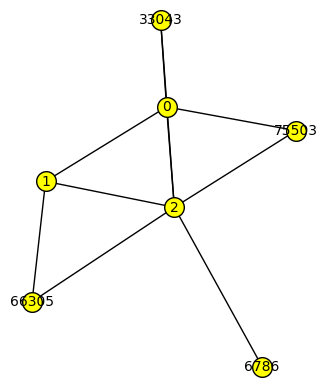

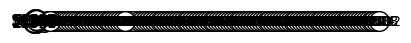

moving: 16803: (-5.60000000000000, 'move', -122.550000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


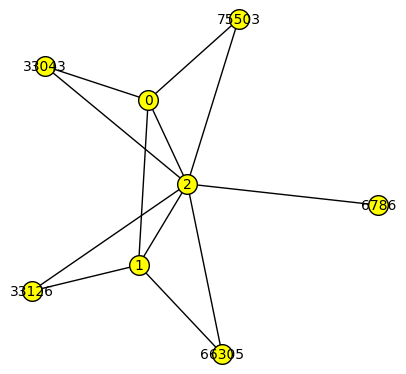

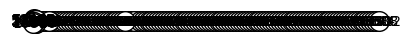

moving: 75213: (-6.55000000000000, 'move', -121.600000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


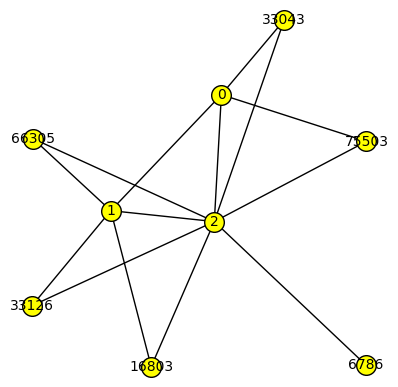

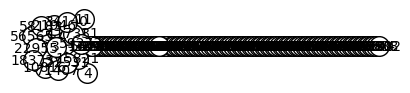

moving: 97758: (-7.50000000000000, 'move', -120.650000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


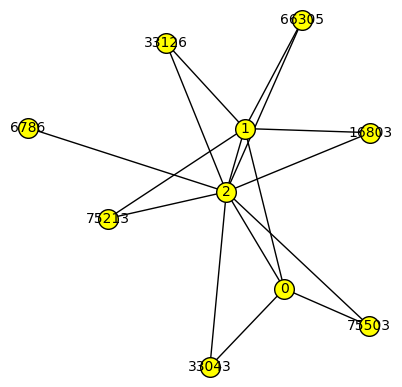

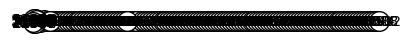

moving: 54787: (-9.45000000000000, 'move', -119.700000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


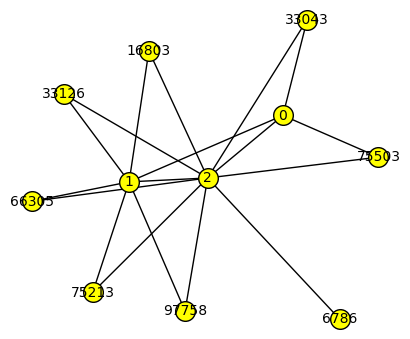

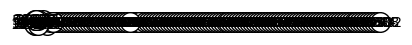

moving: 164373: (-10.4000000000000, 'move', -118.750000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


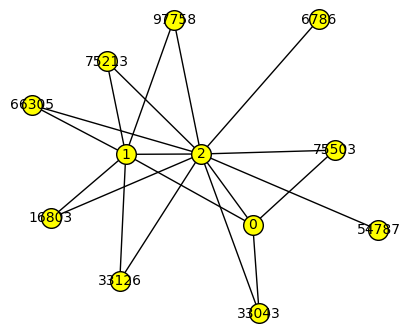

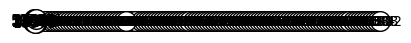

moving: 16408: (-11.3500000000000, 'move', -117.800000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


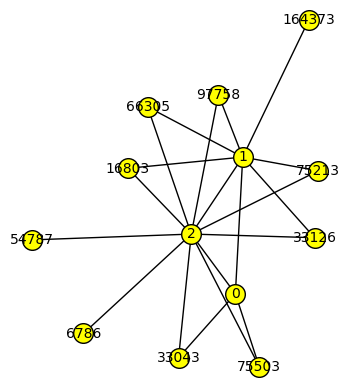

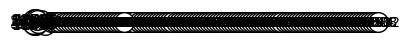

moving: 369692: (-12.3000000000000, 'move', -116.850000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


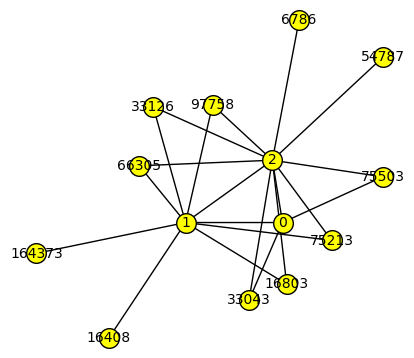

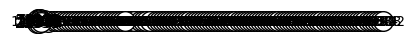

moving: 23073: (-13.2500000000000, 'move', -115.900000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


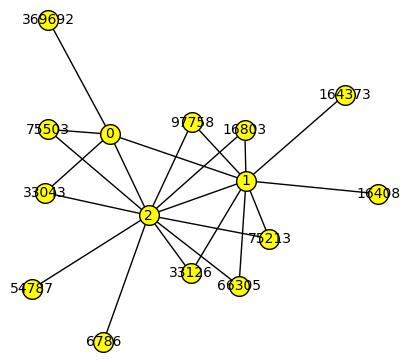

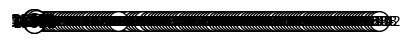

moving: 321570: (-14.2000000000000, 'move', -114.950000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


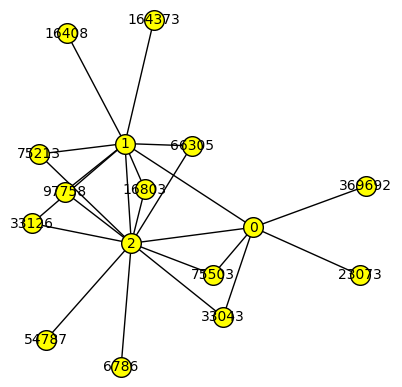

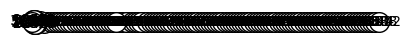

moving: 23595: (-15.1500000000000, 'move', -114.000000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


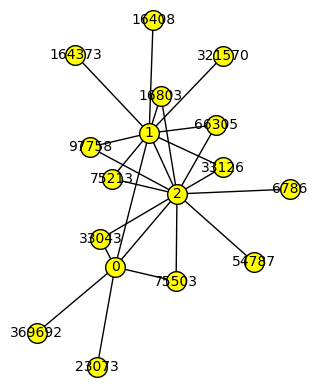

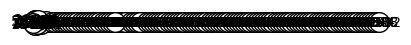

moving: 36918: (-16.1000000000000, 'move', -113.050000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


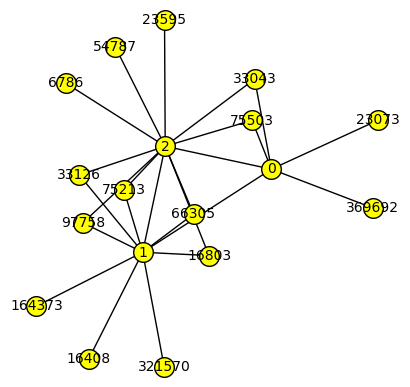

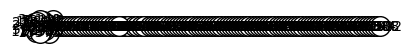

moving: 90680: (-17.0500000000000, 'move', -112.100000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


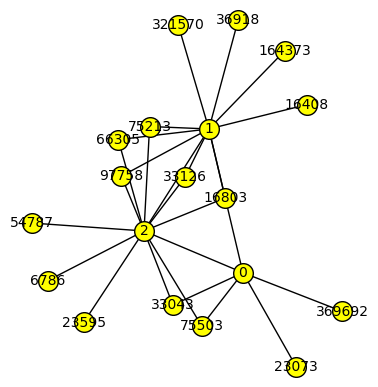

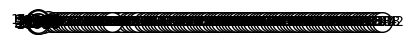

moving: 7741: (-18.0000000000000, 'move', -111.150000000000, 'remain')
===== showing old cluster (yellow) + remaining nodes (white) =====


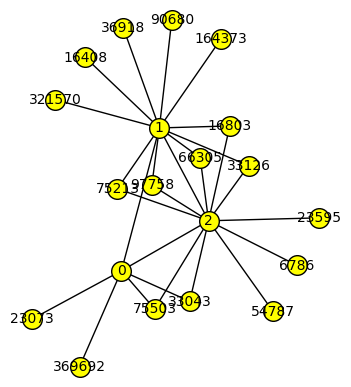

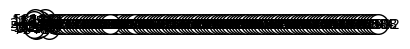

In [7]:
alpha  = 0.95

moved  = True
nmoves = 0

while moved == true and nmoves < 20:

    options      = {}
    bestresponse = {}
    moved        = False
    
    for i in G.vertices():
        
        # print(i)
        if i in current_cluster.vertices():
            other           = 'out'
            reference       = 'cluster'
            other_graph     = current_remainder
            reference_graph = current_cluster
        else:
            other           = 'cluster'
            reference       = 'out'
            other_graph     = current_cluster
            reference_graph = current_remainder 
            
        di      = reference_graph.degree(i)
        hedonic = (1 - alpha) * di - alpha * (reference_graph.num_verts() - di - 1)
        options[(i,reference)] = (di, hedonic)
        H = copy(other_graph)
        H.add_vertex(i)
        
        for j in other_graph.vertices():
            if i in G.neighbors(j): 
                H.add_edge(i,j)
                H.add_edge(j,i)

        di = H.degree(i)
        hedonic = (1 - alpha) * di - alpha * (H.num_verts() - di - 1)
        options[(i,other)] = (di, hedonic)

        
        if options[(i,other)][1] > options[(i,reference)][1]:
            bestresponse[i] = (options[(i,other)][1],    'move',
                               options[(i,reference)][1],'remain')
            
        elif options[(i,other)][1] < options[(i,reference)][1]:
            bestresponse[i] = (options[(i,reference)][1], 'remain',
                               options[(i,other)][1],     'move')
        
        elif sage.misc.prandom.choice([0,1]) == 0:
            bestresponse[i] = (options[(i,other)][1], 'move', 'tie',
                               options[(i,reference)][1], 'remain')
        
        else:
            bestresponse[i] = (options[(i,reference)][1], 'remain', 'tie',
                               options[(i,other)][1], 'move')

 
    print >> fp, '\n\n next best response vector.  node: (value, move/remain) \n\n'
        
    for key, value in sorted(bestresponse.iteritems(), key = lambda (k,v): -v[0]):
        print >> fp, "%s: %s \n\n" % (key, value);   
            
    sys.stdout.flush();   
    
    for key, value in sorted(bestresponse.iteritems(), key = lambda (k,v): -v[0]):
        if value[1] == 'move':
            print "moving: %s: %s" % (key, value)
            break
    
    if value[1] == 'move':
        
        print("===== showing old cluster (yellow) + remaining nodes (white) =====")
        current_cluster.show(vertex_colors = 'yellow')
        current_remainder.show(vertex_colors = 'white')
        
        aux_string = str(key) + ' will move'
        print >> fp, aux_string

        if key in current_cluster.vertices():
            print('edges')
            print(G.edges())
            reference_graph = current_cluster
            other_graph     = current_remainder
        else:
            reference_graph = current_remainder
            other_graph     = current_cluster
        
        vertices_of_other_graph = copy(other_graph.vertices())
        other_graph.add_vertex(key)

        for j in vertices_of_other_graph:
            if key in G.neighbors(j):
                other_graph.add_edge(key, j)
                other_graph.add_edge(j, key)
        
        reference_graph.delete_vertex(key)    
        sys.stdout.flush();  
         
        print >> fp, '==== showing new cluster + remaining nodes ===='
        pl = current_cluster.graphplot(vertex_colors = 'yellow')
        
        print >> fp, 'current cluster: \n \n'
        print >> fp, '\\begin{figure}[h!]'
        print >> fp, latex(current_cluster)
        print >> fp, '\end{figure}'

        pl = current_remainder.graphplot(vertex_colors = 'white')
        print >> fp, 'current remainder: \n \n'
        print >> fp, '\\begin{figure}[h!]'
        print >> fp, latex(current_remainder)
        print >> fp, '\end{figure}'
       
        current_cluster.plot(vertex_colors = 'yellow').save('/tmp/foo.png')

        import matplotlib.pyplot
        img = matplotlib.image.imread('/tmp/foo.png')
        matrix_plot(img)
        
        current_remainder.plot(vertex_colors = 'white').save('/tmp/foo.png')
        sys.stdout.flush();
        print >> fp, '\clearpage \pagebreak'
         
        moved   = True
        nmoves += 1
        
fp.close()